HIPOTESIS EDA:

EN ESTE EDA SE QUIERE DEMOSTRAR QUE LAS POLITICAS DE IZQUIERDAS Y GLOBALISTAS, QUE SE REFLEJAN EN INDICADORES QUE SON CONSECUENCIA DE LA EMISION DESENFRENADA DE DEUDA, Y EL AUMENTO FISCAL TIENEN UN EFECTO NEGATIVO EN LOS VALORES ÉTICOS, SALUD TANTO FÍSICA Y MENTAL,
ADEMAS DE REPERCUTIR EN EL PRESTIGIO DADO POR LA CIUDADANIA ACTIVA AL LOBBY POLÍTICO Y ORGANISMOS QUE REPRESENTAN AL SISTEMA ,(Cuerpo policial, organismos internacionales, Eurodiputados, etc.)
EN ESTE CASO EL ESTUDIO SOLO SE CENTRARA EN LA EUROZONA. Y MAS DETALLADAMENTE EN SUBGRUPOS DE PAISES QUE TIENEN PARECIDOS EN LAS CARACTERISTICAS ECONOMICAS, CULTURALES Y CON CIERTA CERCANIA GEOGRAFICA.


EN RESUMEN SE DEMOSTRARA LA RELACION POSITIVA ENTRE LA INFLACION, EL BAJO SUELDO BRUTO MENSUAL MEDIO DEL PAIS Y CONDUCTAS NEGATIVAS PARA EL SISTEMA DE LA CIUDADANIA.

PLANTEAMIENTO:
Para ello haremos una división de nuestro dataset basandonos en la inflación, sueldo bruto mensual medio y pib per capita, para crear subgrupos que tengan similitudes socioeconomicas, compararemos los datos respecto a la Eurozona en general. Haremos un trabajo de etiquetación ademas de proponer varias variables de diferente campo semantico como targets.

Preparacion de datos:
Vamos a preparar los dataframes, descargandolos de la base de datos sql "database9k.db"

In [1]:
#1) Creacion de Subgrupos de paises:
import pandas as pd
from sqlalchemy import create_engine, text
import os
import sqlite3
#1.1 Nos conectamos a la base de datos.
database_path = os.path.abspath("C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db")
print(f"Database path: {database_path}")
conn = create_engine(f'sqlite:///{database_path}')
# Execute the SQL query, ya hemos visto en el visualizador de sql que los datos que deberian ser numericos hay algunas columnas que son formato texto, 
# hacemos un query para transformarlos just antes de almacenarlos en un dataframe

#DF inflacion
query = """
SELECT País, REPLACE(Inflación, ',', '.') AS Inflación_Float
FROM EuroInfl
"""
#Creamos un diccionario para almacenar la conversion
dtype_dict = {'Inflación_Float': float}
# Load the DataFrame with the dtype dictionary
df_inf = pd.read_sql_query(query, conn, dtype=dtype_dict)
df_inf.drop_duplicates(subset='País', keep='first', inplace=True)

#DF PPC
query = f"""
SELECT País, ROUND(PPC) AS PPC_INTEGER
FROM EuroPPC
"""
df_PPC = pd.read_sql_query(query, conn)
df_PPC.drop_duplicates(subset='País', keep='first', inplace=True)
print(df_PPC)

#DF SBMM
query = """
SELECT País, REPLACE(SBMM, ',', '.') AS SBMM_Float
FROM EuroSBMM
"""
dtype_dict = {'SBMM': float}
df_SBMM = pd.read_sql_query(query, conn)
df_SBMM.drop_duplicates(subset='País', keep='first', inplace=True)
df_SBMM['País'] = df_SBMM['País'].str.strip().str.lower()

conn.dispose()
print(df_SBMM)


Database path: C:\GitHubRepos\ProyectoFinal\data\processed\Dataset9k.db
                  País  PPC_INTEGER
0        Unión Europea         41.0
1             Bulgaria         16.0
2              Rumania         18.0
3              Croacia         22.0
4              Polonia         22.0
5              Hungría         22.0
6              Letonia         23.0
7               Grecia         23.0
8   República Eslovaca         24.0
9             Portugal         27.0
10            Lituania         28.0
11             Estonia         30.0
12     República Checa         32.0
13           Eslovenia         33.0
14              España         34.0
15              Chipre         37.0
16              Italia         39.0
17               Malta         40.0
18             Francia         45.0
19           Finlandia         53.0
20            Alemania         54.0
21             Bélgica         55.0
22              Suecia         56.0
23             Austria         56.0
24        Países Bajos      

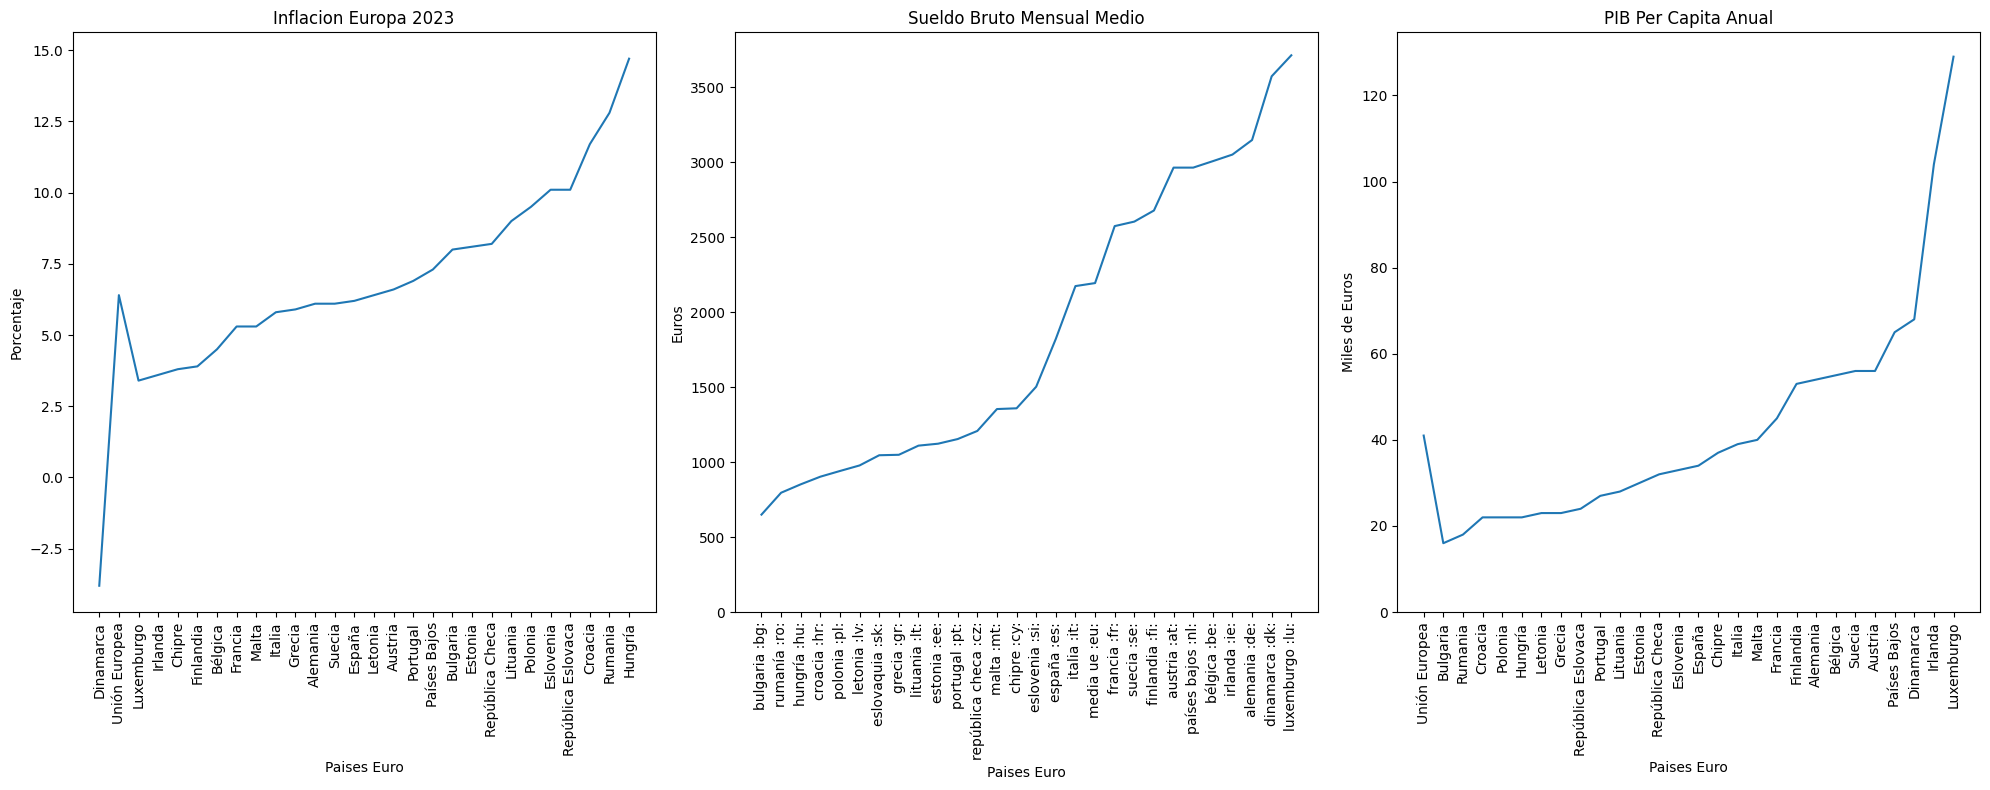

In [2]:
#1.5 Representacion Graficos Economicos.
import pandas as pd
import matplotlib.pyplot as plt

# Crear una figura con 3 subplots en una fila
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Graficar cada DataFrame en un subplot diferente
axes[0].plot(df_inf['País'], df_inf['Inflación_Float'])
axes[0].set_title('Inflacion Europa 2023')
axes[0].set_xlabel('Paises Euro')
axes[0].set_ylabel('Porcentaje')
axes[0].tick_params(axis='x', rotation=90)  


df_SBMM['SBMM_Float'] = pd.to_numeric(df_SBMM['SBMM_Float'].str.replace(',', '.'), errors='coerce')
df_SBMM = df_SBMM.dropna(subset=['SBMM_Float'])
df_SBMM = df_SBMM.sort_values(by='SBMM_Float')
axes[1].plot(df_SBMM['País'], df_SBMM['SBMM_Float'])
axes[1].set_title('Sueldo Bruto Mensual Medio')
axes[1].set_xlabel('Paises Euro')
axes[1].set_ylabel('Euros')
axes[1].set_ylim(ymin=0) 
axes[1].tick_params(axis='x', rotation=90)  

axes[2].plot(df_PPC['País'], df_PPC['PPC_INTEGER'])
axes[2].set_title('PIB Per Capita Anual')
axes[2].set_xlabel('Paises Euro')
axes[2].set_ylabel('Miles de Euros')
axes[2].set_ylim(ymin=0)  
axes[2].tick_params(axis='x', rotation=90)  

plt.tight_layout()
plt.show()

In [7]:
print(df_SBMM['País'].unique())

KeyError: 'País'

In [ ]:
equivalencias = {
    'bulgaria :bg:': 'Bulgaria',
    'rumanía :ro:': 'Rumania',
    'hungría :hu:': 'Hungría',
    'croacia :hr:': 'Croacia',
    'polonia :pl:': 'Polonia',
    'letonia :lv:': 'Letonia',
    'bulgaria :bg:': 'Bulgaria',
    'luxemburgo :lu:': 'Luxemburgo',
    'dinamarca :dk:': 'Dinamarca'
}
df_SBMM['País'] = df_SBMM['País'].map(equivalencias)
print(df_SBMM)

KeyError: 'País'

In [ ]:
#Procedemos a descargar la tabla de Inflacion en la zona euro del 2023, dado que la del año 2024 aun no esta disponible.
driver = webdriver.Chrome()
url = "https://datos.bancomundial.org/indicador/NY.GDP.DEFL.KD.ZG?contextual=region&end=2023&locations=EU-DK&most_recent_value_desc=false&start=1961&view=chart"
#Nuestra tabla esta anidada en un div de esta forma:
#<div><div class="item" style="min-height: 58px;"><div data-customlink="nl:body content" data-text="Dinamarca">ent_value<a class="country-name" 
#href="/indicador/NY.GDP.DEFL.KD.ZG?contextual=region&amp;end=2023&amp;locations=EU-DK&amp;most_rec_desc=false&amp;start=1961&amp;view=chart">Dinamarca</a></div><div>2023</div><div>-3,8</div><div>
'''Como vemos, encontramos los paises dentro de un div por el class name de country-name y los datos de año e inflacion en dos items div posteriormente'''
driver.get(url)
# XPath para encontrar todos los elementos con la clase 'item'
xpath_items = "//div[@class='item']"
items = driver.find_elements(By.XPATH, xpath_items)
data = []
for item in items:
    # Extraer el nombre del país
    pais = item.find_element(By.XPATH, ".//a[@class='country-name']").text.strip()

    # Extraer el año
    año = item.find_elements(By.TAG_NAME, "div")[1].text.strip() 

    # Extraer el valor de la inflación
    inflacion = item.find_elements(By.TAG_NAME, "div")[2].text.strip() 

    data.append({"País": pais, "Año": año, "Inflación": inflacion})

# Crear un DataFrame de pandas
df_inflacion = pd.DataFrame(data)
print(df_inflacion)
# Crear la tabla si no existe
conn = sqlite3.connect('C:/GitHubRepos/ProyectoFinal/data/processed/Dataset9k.db')
conn.execute( ''' CREATE TABLE IF NOT EXISTS EuroInfl (
        Pais TEXT,
        Año INTEGER,
        Inflacion REAL
    )
''')
#Introducimos el dataframe creado dentro de nuestra base de datos
df_inflacion.to_sql('EuroInfl', conn, if_exists='replace', index=False)

# Cerrar la conexión a la base de datos
conn.close()
del df_inflacion

                  País   Año Inflación
0            Dinamarca  2023      -3,8
1        Unión Europea  2023       6,4
2            Dinamarca  2023      -3,8
3           Luxemburgo  2023       3,4
4              Irlanda  2023       3,6
5               Chipre  2023       3,8
6            Finlandia  2023       3,9
7              Bélgica  2023       4,5
8              Francia  2023       5,3
9                Malta  2023       5,3
10              Italia  2023       5,8
11              Grecia  2023       5,9
12            Alemania  2023       6,1
13              Suecia  2023       6,1
14              España  2023       6,2
15             Letonia  2023       6,4
16             Austria  2023       6,6
17            Portugal  2023       6,9
18        Países Bajos  2023       7,3
19            Bulgaria  2023       8,0
20             Estonia  2023       8,1
21     República Checa  2023       8,2
22            Lituania  2023       9,0
23             Polonia  2023       9,5
24           Eslovenia  2

In [4]:
import pandas as pd
df_inf.set_index('País', inplace=True)
df_PPC.set_index('País', inplace=True)
df_SBMM.set_index('País', inplace=True)

# Unir los DataFrames
df_combinado = pd.concat([df_inf, df_PPC, df_SBMM], axis=1)

print(df_combinado)

                      Inflación_Float  PPC_INTEGER  SBMM_Float
País                                                          
Dinamarca                        -3.8         68.0         NaN
Unión Europea                     6.4         41.0         NaN
Luxemburgo                        3.4        129.0         NaN
Irlanda                           3.6        104.0         NaN
Chipre                            3.8         37.0         NaN
Finlandia                         3.9         53.0         NaN
Bélgica                           4.5         55.0         NaN
Francia                           5.3         45.0         NaN
Malta                             5.3         40.0         NaN
Italia                            5.8         39.0         NaN
Grecia                            5.9         23.0         NaN
Alemania                          6.1         54.0         NaN
Suecia                            6.1         56.0         NaN
España                            6.2         34.0     